### 1. 加载图片

(640, 854, 3)
(640, 854)
(192, 256)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  app.launch_new_instance()


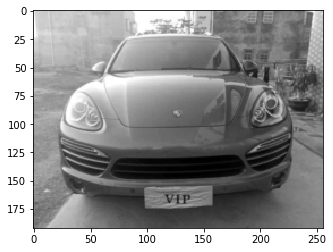

In [18]:
import cv2  # 加载opencv库
import scipy.misc  # 包含改变图像的函数
import matplotlib.pyplot as plt  
import numpy as np
%matplotlib inline

img_path ="car.jpg" # 图片的路径

# 加载彩色图片
rgb_image = cv2.imread(img_path)
print(np.shape(rgb_image)) # (640, 854, 3),像素是640*854个，RGB图是三维的
# 把彩色图片转换成灰度图片
gray_image = cv2.cvtColor(rgb_image,cv2.COLOR_BGR2GRAY)
print(np.shape(gray_image)) # (640, 854),像素是640*854个，灰度图是一维的
# 改变图片的大小
small_image = scipy.misc.imresize(gray_image, 0.3)  # imresize函数把图片改变为原来的0.3倍，并隐藏归一化到0-255 
print(np.shape(small_image)) # (192, 256)
# 把矩阵中的数值归一化到0-1之间
small_image = small_image.astype("float32")/255 

plt.imshow(small_image, cmap='gray')  # 显示图片，灰色
plt.show()

### 2. 设置过滤器

filter_vals=
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]
[array([[-1, -1,  1,  1],
       [-1, -1,  1,  1],
       [-1, -1,  1,  1],
       [-1, -1,  1,  1]]), array([[ 1,  1, -1, -1],
       [ 1,  1, -1, -1],
       [ 1,  1, -1, -1],
       [ 1,  1, -1, -1]]), array([[-1, -1, -1, -1],
       [-1, -1, -1, -1],
       [ 1,  1,  1,  1],
       [ 1,  1,  1,  1]]), array([[ 1,  1,  1,  1],
       [ 1,  1,  1,  1],
       [-1, -1, -1, -1],
       [-1, -1, -1, -1]])]


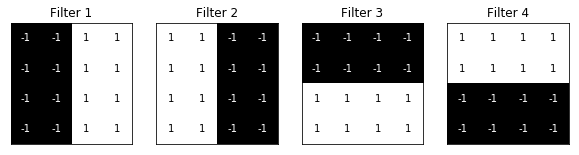

In [33]:
import numpy as np

filters = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])
print('filter_vals=\n',filter_vals)
# 定义四个过滤器,分别对应不同的特征
filter_1 = filters  
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
four_filters = [filter_1, filter_2, filter_3, filter_4]
print(four_filters)

# 可视四个过滤器
fig = plt.figure(figsize=(10, 5))  # 设置图像的大小是10*5
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(four_filters[i], cmap='gray')  # 显示过滤器的图像
    ax.set_title('Filter %s' % str(i+1))  # 设置图像标题
    width, height = four_filters[i].shape  
    for x in range(width):
        for y in range(height):
            ax.annotate(str(four_filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center', 
                        color='white' if four_filters[i][x][y]<0 else 'black') # 小于0的区域设置为黑色，其他白色

### 3. 可视化每个过滤器的激活映射

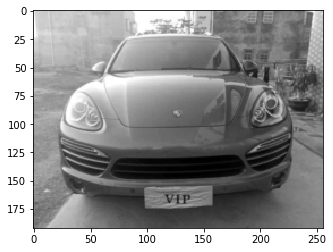

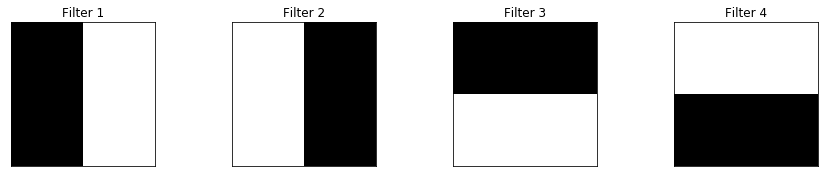

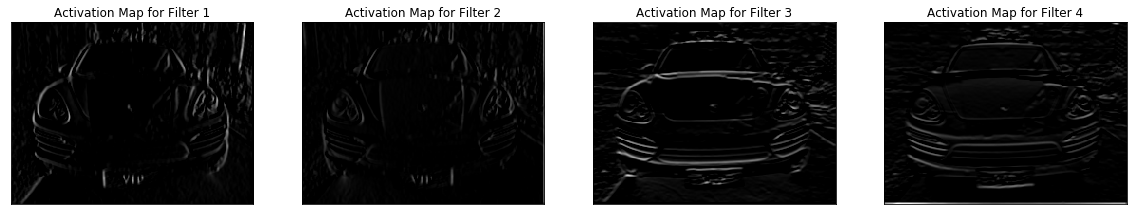

In [69]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
import matplotlib.cm as cm

# 显示灰度图像
plt.imshow(small_image, cmap='gray')

# 添加一个只有一个过滤器的卷积层
model = Sequential()
model.add(Convolution2D(filters=1,   # 过滤器的个数是1
                        kernel_size=4,   # 过滤器的尺寸
                        strides=1,  # 设置步长为1
                        padding='same',  #经过卷积层后的大小不变
                        activation='relu',   # 采用relu激活函数
                        input_shape=(small_image.shape[0], small_image.shape[1], 1)# input_shape为高度、宽度、深度
                        ))

# 显示所有的过滤器图像
fig = plt.figure(figsize=(20, 10))  # 设置图像窗口的大小是20*10
# 子图距画板左边的距离为0，右边是0.6，距离底部0.8，顶部1，水平间距hspace=0.1，垂直间距为0.1
fig.subplots_adjust(left=0, right=0.6, bottom=0.8, top=1, hspace=0.1, wspace=0.1)
for i in range(4): # 显示四个过滤器的图像
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(four_filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

# 可视化所有的激活映射图像
fig = plt.figure(figsize=(20, 10))
for i in range(4):   # 显示经过过滤器后四张输出图
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    # 将卷积层中过滤器的权值设置为filter_list[i],参数的个数是4*4*1*1
    model.layers[0].set_weights([np.reshape(four_filters[i], (4,4,1,1)), np.array([0])])
    # 显示相应的激活映射图像
    ax.imshow(np.squeeze(model.predict(np.reshape(small_image, (1, small_image.shape[0], small_image.shape[1], 1)))), cmap='gray')
    ax.set_title('Activation Map for Filter %s' % str(i+1))